
Phase 1: EDA (Exploratory Data Analysis)
Analyze features: price distribution, area, location, etc.

Handle missing values

Visualizations (optional): Seaborn/Matplotlib

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Hyderabad_House_price.csv')
print("Shape:", df.shape)
df.head()


Shape: (3660, 7)


,Unnamed: 0,title,location,price(L),rate_persqft,area_insqft,building_status
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3660 non-null   int64  
 1   title            3660 non-null   object 
 2   location         3660 non-null   object 
 3   price(L)         3660 non-null   float64
 4   rate_persqft     3660 non-null   int64  
 5   area_insqft      3660 non-null   int64  
 6   building_status  3660 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 200.3+ KB


Text(0.5, 1.0, 'Top 10 Locations')

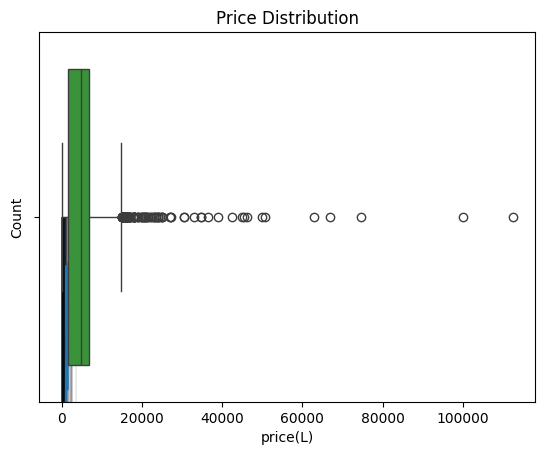

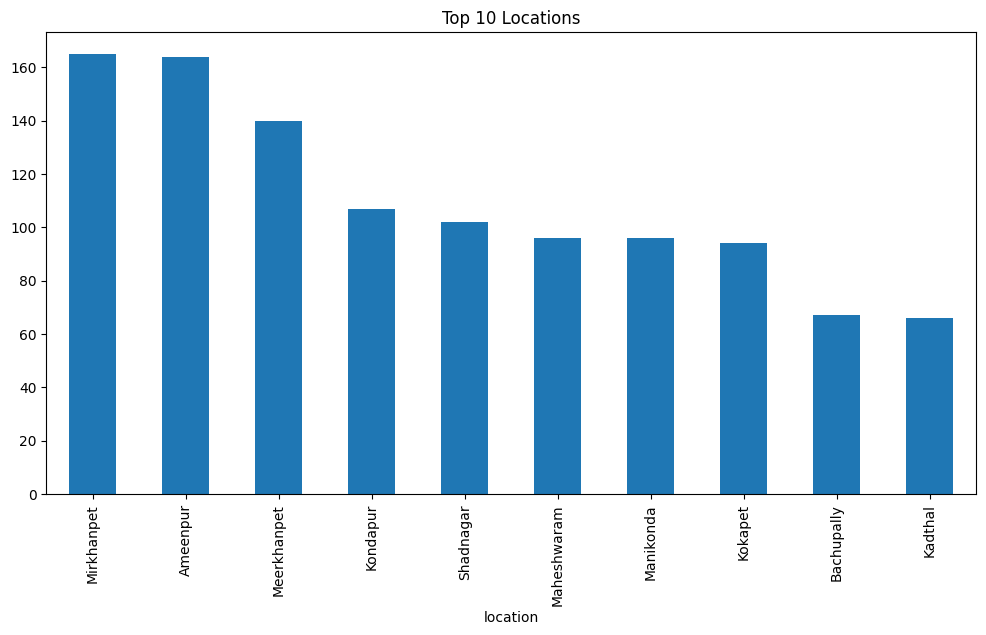

In [63]:
# 1. Check for missing values
df.isnull().sum()

# 2. Data types and basic info
df.info()

# 3. Price distribution
sns.histplot(df['price(L)'], kde=True)
plt.title("Price Distribution")

# 4. Area vs Price
sns.scatterplot(x='area_insqft', y='price(L)', data=df)

# 5. Rate per sqft distribution
sns.boxplot(x='rate_persqft', data=df)

# 6. Location-wise counts
plt.figure(figsize=(12,6))
df['location'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Locations")


🧠 Phase 2: Data Preprocessing + Model Training
Encode categorical variables

Feature selection

Train-Test Split

Use GridSearchCV to tune model hyperparameters

Save model using joblib

Step 1: Load and Clean Data

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Load dataset
df = pd.read_csv("Hyderabad_House_price.csv")

# Drop irrelevant/unnecessary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

# Drop rows with nulls
df.dropna(inplace=True)

# Convert 'Price (L)' to numeric if it's object
df['price(L)'] = pd.to_numeric(df['price(L)'], errors='coerce')
df.dropna(subset=['price(L)'], inplace=True)


Step 2: Encoding Categorical Features

In [65]:
le_location = LabelEncoder()
le_status = LabelEncoder()

df['location_encoded'] = le_location.fit_transform(df['location'])
df['building_status_encoded'] = le_status.fit_transform(df['building_status'])

# Final dataset
X = df[['rate_persqft', 'area_insqft', 'location_encoded', 'building_status_encoded']]
y = df['price(L)']


 Step 3: Train-Test Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4: Model Training with GridSearchCV

In [67]:
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, scoring='r2')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [68]:
#Option A: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R²: 0.6855064540000473
RMSE: 109.27346491533287


In [69]:
#Option B: Random Forest + GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

y_pred_rf = grid.predict(X_test)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Best Parameters: {'max_depth': 10, 'n_estimators': 150}
Random Forest R²: 0.9410070908360991
RMSE: 47.326975619969076


Step 5: Save the Model

In [70]:
joblib.dump(grid.best_estimator_, 'house_price_model.pkl')
print("Model saved as house_price_model.pkl")


Model saved as house_price_model.pkl
